Calling of API 2 years at a time (Alpha Vantage has a limit of 25 calls per day)

In [5]:
import requests
import pandas as pd

# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=CVX&interval=60min&month=2012-12&outputsize=full&apikey=CVQYOGMXJPDIQROQ'
def data_extraction(url,company_name,api_key):
    combined_url = url + api_key
    r = requests.get(combined_url)
    data = r.json()
    time_series = data['Time Series (60min)']
    # Convert JSON to DataFrame
    df = pd.DataFrame.from_dict(time_series, orient='index')
    # Rename the columns for readability
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    # Convert the index to a 'date' column
    df.index.name = 'date'
    df.reset_index(inplace=True)
    # Convert columns to appropriate data types
    df['open'] = pd.to_numeric(df['open'])
    df['high'] = pd.to_numeric(df['high'])
    df['low'] = pd.to_numeric(df['low'])
    df['close'] = pd.to_numeric(df['close'])
    df['volume'] = pd.to_numeric(df['volume'])
    df.insert(1, 'stock_name', company_name)
    return df

stocks_list = ["GS"]
for company_name in stocks_list:
    column_names = ['date', 'stock_name', 'open', 'high', 'low', 'close', 'volume']
    combined_df = pd.DataFrame(columns=column_names)
    for year in range(2023,2024):
        for month in range(1,13):
            if month < 10:
                month = "0" + str(month)
            url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={company_name}&interval=60min&month={year}-{month}&outputsize=full&apikey="
            print(url)
            df = data_extraction(url,company_name,api_key = "")
            combined_df = pd.concat([combined_df, df], axis = 0, ignore_index=True)
            combined_df.to_csv(f"{company_name}_2023.csv") 

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GS&interval=60min&month=2023-01&outputsize=full&apikey=
https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GS&interval=60min&month=2023-02&outputsize=full&apikey=
https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GS&interval=60min&month=2023-03&outputsize=full&apikey=
https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GS&interval=60min&month=2023-04&outputsize=full&apikey=
https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GS&interval=60min&month=2023-05&outputsize=full&apikey=
https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GS&interval=60min&month=2023-06&outputsize=full&apikey=
https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GS&interval=60min&month=2023-07&outputsize=full&apikey=
https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GS&interval=60min&month=2023-08&outputsi

Combining all of the yearly files into company format

In [33]:
import pandas as pd
df = pd.read_csv("MSFT_2013.csv")
df1 = pd.read_csv("MSFT_2014.csv")
df2 = pd.read_csv("MSFT_2015.csv")
df3 = pd.read_csv("MSFT_2016.csv")
df4 = pd.read_csv("MSFT_2017.csv")
df5 = pd.read_csv("MSFT_2018_2019.csv")
df6 = pd.read_csv("MSFT_2020_2021.csv")
df7 = pd.read_csv("MSFT_2022_2023.csv")
combined_msft = pd.concat([df,df1,df2,df3,df4,df5,df6,df7],axis=0,ignore_index=True)
combined_msft = combined_msft.drop(columns="Unnamed: 0")
combined_msft = combined_msft.set_index('date')
combined_msft.to_csv("msft.csv")

df = pd.read_csv("JPM_2013.csv")
df1 = pd.read_csv("JPM_2014.csv")
df2 = pd.read_csv("JPM_2015_2016.csv")
df3 = pd.read_csv("JPM_2017_2018.csv")
df4 = pd.read_csv("JPM_2019_2020.csv")
df5 = pd.read_csv("JPM_2021_2022.csv")
df6 = pd.read_csv("JPM_2023.csv")
combined_jpm = pd.concat([df,df1,df2,df3,df4,df5,df6],axis=0,ignore_index=True)
combined_jpm = combined_jpm.drop(columns="Unnamed: 0")
combined_jpm = combined_jpm.set_index('date')
combined_jpm.to_csv("jpm.csv")

df = pd.read_csv("GS_2013_2014.csv")
df1 = pd.read_csv("GS_2015_2016.csv")
df2 = pd.read_csv("GS_2017_2018.csv")
df3 = pd.read_csv("GS_2019_2020.csv")
df4 = pd.read_csv("GS_2021_2022.csv")
df5 = pd.read_csv("GS_2023.csv")
combined_gs = pd.concat([df,df1,df2,df3,df4,df5],axis=0,ignore_index=True)
combined_gs = combined_gs.drop(columns="Unnamed: 0")
combined_gs = combined_gs.set_index('date')
combined_gs.to_csv("gs.csv")

df = pd.read_csv("CVX_2013.csv")
df1 = pd.read_csv("CVX_2014_2015.csv")
df2 = pd.read_csv("CVX_2016_2017.csv")
df3 = pd.read_csv("CVX_2018_2019.csv")
df4 = pd.read_csv("CVX_2020_2021.csv")
df5 = pd.read_csv("CVX_2022_2023.csv")

combined_cvx = pd.concat([df,df1,df2,df3,df4,df5],axis=0,ignore_index=True)
combined_cvx = combined_cvx.drop(columns="Unnamed: 0")
combined_cvx = combined_cvx.set_index('date')
combined_cvx.to_csv("cvx.csv")

df = pd.read_csv("XOM_2013_2014.csv")
df1 = pd.read_csv("XOM_2015_2016.csv")
df2 = pd.read_csv("XOM_2017_2018.csv")
df3 = pd.read_csv("XOM_2019_2020.csv")
df4 = pd.read_csv("XOM_2021_2022.csv")
df5 = pd.read_csv("XOM_2023.csv")

combined_xom = pd.concat([df,df1,df2,df3,df4,df5],axis=0,ignore_index=True)
combined_xom = combined_xom.drop(columns="Unnamed: 0")
combined_xom = combined_xom.set_index('date')
combined_xom.to_csv("xom.csv")

In [5]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\xutia\Desktop\NUS\Y4S1\DSE4212\project\DSE4212\data\fundamental indicators\stock_data.csv")
df = df[df["Date"] >= "2014-01-01"]
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,RSI,BOLL_Upper,BOLL_Middle,BOLL_Lower,KDJ_K,KDJ_D,Stock
3521,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253262,234684800,0.194637,50.996184,20.463378,19.979268,19.495157,49.361370,57.210185,AAPL
3522,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874271,392467600,0.132887,43.883530,20.489365,19.936375,19.383385,34.103965,47.716298,AAPL
3523,2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966295,412610800,0.091398,45.858023,20.465096,19.893571,19.322047,20.708932,34.724756,AAPL
3524,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844954,317209200,0.046768,43.675706,20.484633,19.857893,19.231153,15.185924,23.332940,AAPL
3525,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951633,258529600,0.021012,46.104119,20.448289,19.816875,19.185461,23.758045,19.884300,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60663,2024-07-25,115.169998,118.029999,114.559998,117.430000,116.492142,17021700,0.657814,58.123697,118.523459,114.686501,110.849542,41.294478,41.475821,XOM
60664,2024-07-26,116.769997,118.029999,116.470001,117.330002,116.392937,11252500,0.768894,57.786044,118.814459,114.808001,110.801542,52.829003,43.739648,XOM
60665,2024-07-29,117.320000,117.389999,115.379997,116.099998,115.172760,8861800,0.749039,53.657063,118.901316,114.857000,110.812685,56.691018,50.271500,XOM
60666,2024-07-30,116.360001,118.599998,116.230003,118.169998,117.226227,12483900,0.890076,58.970384,119.312441,115.017500,110.722560,60.291981,56.604001,XOM


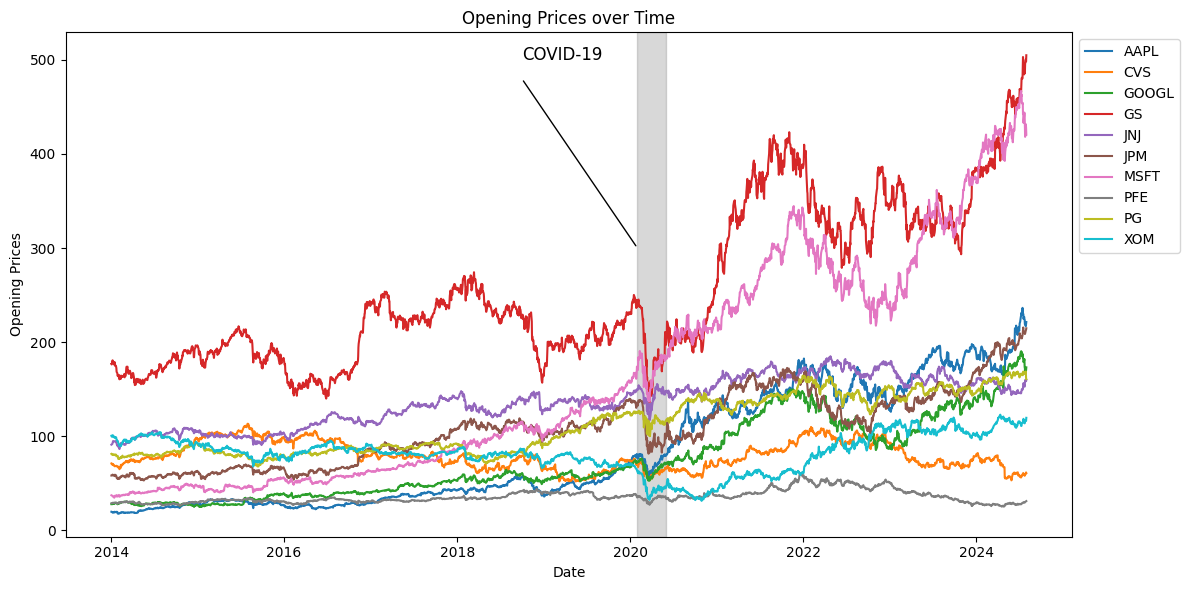

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your data into a DataFrame (replace 'your_dataframe.csv' with your actual file)
# df = pd.read_csv('your_dataframe.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define the COVID-19 period
covid_start = pd.Timestamp('2020-02-01')
covid_end = pd.Timestamp('2020-06-01')

# Filter the data to include only the relevant columns
plot_data = df[['Date', 'Open', 'Stock']]

# Pivot the data to have stocks as columns and dates as rows
pivot_data = plot_data.pivot(index='Date', columns='Stock', values='Open')

# Plotting
plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], label=column)

# Add a shaded area for the COVID-19 period
plt.axvspan(covid_start, covid_end, color='gray', alpha=0.3)

# Adjust the COVID-19 label placement and shorten the annotation line
plt.text(pd.Timestamp('2018-10-01'), 500, 'COVID-19', fontsize=12, color='black')
plt.annotate('', 
             xy=(covid_start, 300),   # adjusted start of arrow closer to the shaded zone
             xytext=(pd.Timestamp('2018-10-01'), 480),  # adjusted end of arrow closer to the label
             arrowprops=dict(arrowstyle='-', color='black'))

# Customize the plot
plt.title('Opening Prices over Time')
plt.xlabel('Date')
plt.ylabel('Opening Prices')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Set date formatting on x-axis to show every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Remove the grid lines
plt.gca().grid(False)

# Display the plot
plt.show()
